Anomaly Counts:
 Anomaly
 1    9109
-1      10
Name: count, dtype: int64
Actual vs Detected Fraud:
 Anomaly  -1     1
Class            
0.0       6  9086
1.0       4    23


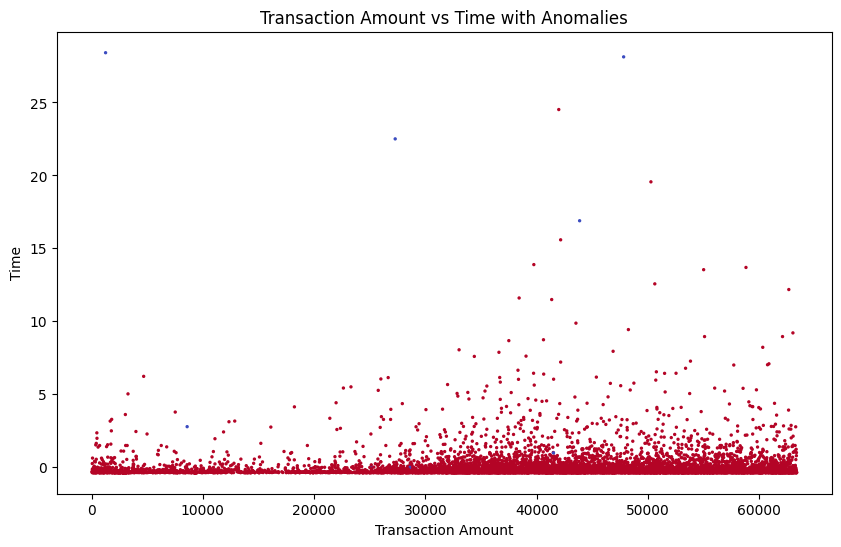

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load the fraud detection dataset
fraud_df = pd.read_csv('creditcard_for_fraud_detection.csv')

# Standardize the 'Amount' feature
scaler = StandardScaler()
fraud_df['Amount'] = scaler.fit_transform(fraud_df[['Amount']])

# Sample 10% of the data to make processing faster
sampled_fraud_df = fraud_df.sample(frac=0.1, random_state=42)

# Remove rows with missing values
sampled_fraud_df = sampled_fraud_df.dropna()

# Train the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.001, random_state=42)
sampled_fraud_df['Anomaly'] = isolation_forest.fit_predict(sampled_fraud_df.drop(columns=['Class']))

# Compare detected anomalies with actual frauds
actual_vs_detected = pd.crosstab(sampled_fraud_df['Class'], sampled_fraud_df['Anomaly'])

# Print results
print("Anomaly Counts:\n", sampled_fraud_df['Anomaly'].value_counts())
print("Actual vs Detected Fraud:\n", actual_vs_detected)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(sampled_fraud_df['Time'], sampled_fraud_df['Amount'], c=sampled_fraud_df['Anomaly'], cmap='coolwarm', s=2)
plt.xlabel('Transaction Amount')
plt.ylabel('Time')
plt.title('Transaction Amount vs Time with Anomalies')
plt.show()
